In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv("C:/Users/kanak/Downloads/day 10/Book1.csv")

In [75]:
df1=df.copy()

In [100]:
df1

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s,SEASON,RATING,Performance_Score
0,Sai Sudharsan,GT,759,15,15,1,NaN,54.21,486,156.17,1,6,88,21,2024,10,118533.03
1,Surya Kumar Yadav,MI,717,16,16,5,NaN,65.18,427,167.91,0,5,69,38,2023,6,120391.47
2,Virat Kohli,RCB,657,15,15,3,NaN,54.75,454,144.71,0,8,66,19,2024,9,95074.47
3,Shubman Gill,GT,650,15,15,2,NaN,50.00,417,155.87,0,6,62,24,2022,5,101315.50
4,Mitchell Marsh,LSG,627,13,13,0,117.0,48.23,383,163.70,1,6,56,37,2024,8,102639.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,NaN,NaN,2,50.00,0,0,0,0,2023,5,50.00
152,Mohit Sharma,DC,1,8,2,1,NaN,1.00,3,33.33,0,0,0,0,2023,9,33.33
153,Donovan Ferreira,DC,1,1,1,0,1.0,1.00,3,33.33,0,0,0,0,2024,7,33.33
154,Digvesh Singh,LSG,1,13,2,1,1.0,1.00,3,33.33,0,0,0,0,2024,5,33.33


In [79]:
df1.dtypes

Player Name     object
Team            object
Runs             int64
Matches          int64
Inn              int64
No               int64
HS             float64
AVG            float64
BF               int64
SR             float64
100s             int64
50s              int64
4s               int64
6s               int64
SEASON           int64
RATING           int64
dtype: object

In [78]:
# Convert columns
df1["HS"] = pd.to_numeric(df["HS"], errors='coerce')    # converts to int or float
df1["AVG"] = pd.to_numeric(df["AVG"], errors='coerce') 

In [99]:
df1['Performance_Score'] = df1['Runs'] * df1['SR']

In [81]:
# Calculate performance metric
df1['Performance_Score'] = df1['Runs'] * df1['SR']

# Get top 5 performers per season
top_performers = df1.sort_values(['SEASON', 'Performance_Score'], ascending=[True, False]).groupby('SEASON').head(5)

# Display
top_performers[['Player Name', 'Team', 'SEASON', 'Matches', 'Runs', 'SR', 'RATING', 'Performance_Score']]


,Player Name,Team,SEASON,Matches,Runs,SR,RATING,Performance_Score
5,Shreyas Iyer,PBKS,2021,17,604,175.07,9,105742.28
6,Yashasvi Jaiswal,RR,2021,14,559,159.71,7,89277.89
9,Jos Buttler,GT,2021,14,538,163.03,8,87710.14
12,Priyansh Arya,PBKS,2021,17,475,179.24,5,85139.00
40,Naman Dhir,MI,2021,16,252,182.60,8,46015.20
3,Shubman Gill,GT,2022,15,650,155.87,5,101315.50
16,Phil Salt,RCB,2022,13,403,175.98,5,70919.94
17,Riyan Parag,RR,2022,14,393,166.52,10,65442.36
20,Travis Head,SRH,2022,13,374,162.60,6,60812.40
19,Ryan Rickelton,MI,2022,14,388,150.97,6,58576.36


In [85]:
# Group by player and season, get total performance
player_season_perf = df1.groupby(['Player Name', 'SEASON']).agg(
    Matches_Played=('Matches','sum'),
    Runs=('Runs','sum'),
    Strike_Rate=('SR','mean'),
    Performance_Score=('Performance_Score','sum')
).reset_index()


In [86]:
pivot_perf = player_season_perf.pivot(index='Player Name', columns='SEASON', values='Performance_Score').fillna(0)


In [87]:
# Only numeric columns (Performance_Score per season)
season_cols = pivot_perf.columns[pivot_perf.columns != 'Trend']  # exclude Trend if it exists

def classify_trend(row):
    values = row[season_cols].values  # select only numeric performance scores
    # Remove 0 or NaN if player didn't play in a season
    values = [v for v in values if v > 0]
    if len(values) < 2:  # not enough data to judge
        return 'Insufficient Data'
    if all(x < y for x, y in zip(values, values[1:])):
        return 'Improving'
    elif all(x > y for x, y in zip(values, values[1:])):
        return 'Declining'
    else:
        return 'Inconsistent'

pivot_perf['Trend'] = pivot_perf.apply(classify_trend, axis=1)
print(pivot_perf['Trend'])


Player Name
Abdul Samad         Insufficient Data
Abhinav Manohar     Insufficient Data
Abhishek Sharma     Insufficient Data
Abishek Porel       Insufficient Data
Aiden Markram       Insufficient Data
                          ...        
Wiaan Mulder        Insufficient Data
Will Jacks          Insufficient Data
Xavier Bartlett     Insufficient Data
Yash Dayal          Insufficient Data
Yashasvi Jaiswal    Insufficient Data
Name: Trend, Length: 156, dtype: object


In [88]:
# Aggregate team-wise stats
team_perf = df1.groupby('Team').agg(
    Team_Total=('Performance_Score', 'sum'),
    Max_Player=('Performance_Score', 'max')
).reset_index()

# Calculate Top Player Percentage
team_perf['Top_Player_Percent'] = (team_perf['Max_Player'] / team_perf['Team_Total']) * 100

# Classify team type
def classify_team(row):
    if row['Top_Player_Percent'] <= 35:
        return 'Balanced'
    elif row['Top_Player_Percent'] >= 45:
        return 'Star-Dependent'
    else:
        return 'Moderately Balanced'

team_perf['Team_Type'] = team_perf.apply(classify_team, axis=1)

# Format percentage for display
team_perf['Top_Player_Percent'] = team_perf['Top_Player_Percent'].round(2).astype(str) + '%'

# Display
team_perf[['Team','Team_Total','Max_Player','Top_Player_Percent','Team_Type']]


,Team,Team_Total,Max_Player,Top_Player_Percent,Team_Type
0,CSK,333354.25,47202.54,14.16%,Balanced
1,DC,359710.22,80699.08,22.43%,Balanced
2,GT,440706.35,118533.03,26.9%,Balanced
3,KKR,276689.87,57610.80,20.82%,Balanced
4,LSG,416861.93,102835.00,24.67%,Balanced
5,MI,438112.06,120391.47,27.48%,Balanced
6,PBKS,486910.73,105742.28,21.72%,Balanced
7,RCB,404480.98,95074.47,23.51%,Balanced
8,RR,399772.50,89277.89,22.33%,Balanced
9,SRH,384720.86,84898.21,22.07%,Balanced


In [89]:
player_season_perf = df1.groupby(['Player Name', 'SEASON']).agg(
    Performance_Score=('Performance_Score', 'sum')
).reset_index()


In [91]:
# Pivot: rows=players, columns=seasons
pivot_perf = player_season_perf.pivot(index='Player Name', columns='SEASON', values='Performance_Score').fillna(0)

# Calculate standard deviation (SD) and CV
pivot_perf['SD'] = pivot_perf.std(axis=1)
pivot_perf['Mean'] = pivot_perf.mean(axis=1)
pivot_perf['CV'] = pivot_perf['SD'] / pivot_perf['Mean']  # lower CV = more consistent

# Sort by CV ascending → most consistent first
consistent_players = pivot_perf.sort_values('CV').reset_index()
consistent_players[['Player Name','Mean','SD','CV']]


SEASON,Player Name,Mean,SD,CV
0,Dushmantha Chameera,214.260,357.100,1.666667
1,Moeen Ali,53.565,89.275,1.666667
2,Ryan Rickelton,17572.908,29288.180,1.666667
3,Abdul Samad,8675.928,14459.880,1.666667
4,Atharva Taide,563.316,938.860,1.666667
...,...,...,...,...
151,Krunal Pandya,4144.398,6907.330,1.666667
152,Rishabh Pant,10746.012,17910.020,1.666667
153,Ashutosh Sharma,9829.944,16383.240,1.666667
154,Karun Nair,10226.898,17044.830,1.666667


In [94]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Columns to calculate performance
performance_cols = ['Runs', 'AVG', 'SR', '100s', '50s']

# Normalize performance columns to 0-1 scale
scaler = MinMaxScaler()
df[['Runs_norm', 'AVG_norm', 'SR_norm', '100s_norm', '50s_norm']] = scaler.fit_transform(df[performance_cols])

# Compute a combined Performance Score
df['Performance_Score'] = (
    df['Runs_norm'] * 0.4 +  # Weight Runs
    df['AVG_norm'] * 0.2 +   # Weight Average
    df['SR_norm'] * 0.2 +    # Weight Strike Rate
    df['100s_norm'] * 0.1 +  # Weight Centuries
    df['50s_norm'] * 0.1     # Weight Fifties
) * 100  # Scale to 0-100

# Define low recognition threshold (Rating 1-10, assume Rating column exists)
low_recognition_threshold = 5

# Filter underrated players: high performance but low recognition
underrated_players = df[(df['Performance_Score'] >= df['Performance_Score'].quantile(0.75)) & 
                         (df['Rating'] <= low_recognition_threshold)]

# Sort by Performance Score descending
underrated_players = underrated_players.sort_values(by='Performance_Score', ascending=False)

# Display underrated players
print(underrated_players[['Player Name', 'Team', 'Runs', 'AVG', 'SR', '100s', '50s', 'Performance_Score', 'Rating']])


ModuleNotFoundError: No module named 'sklearn'

SR > 180 and Matches <= 7
Runs > 500 and SR < 120
AVG > 50 and Inn <= 5


In [104]:
# High SR outliers (very high strike rate but few matches)
high_sr_outliers = df1[(df1['SR'] > 180) & (df1['Matches'] <= 7)]

# Low SR outliers (very low strike rate despite many matches)
low_sr_outliers = df1[(df1['SR'] < 120) & (df1['Matches'] >= 15)]

# Combine for review (optional)
sr_outliers = pd.concat([high_sr_outliers, low_sr_outliers]).drop_duplicates()

# Display relevant columns
print("Strike Rate Outliers:")
print(sr_outliers[['Player Name', 'Team', 'Matches', 'SR', 'Runs', 'AVG']])


Strike Rate Outliers:
             Player Name  Team  Matches      SR  Runs    AVG
39   Vaibhav Suryavanshi    RR        7  206.55   252  36.00
43          Ayush Mhatre   CSK        7  188.97   240  34.29
80        Jonny Bairstow    MI        2  184.78    85  42.50
85           Urvil Patel   CSK        3  212.50    68  22.67
105         Kusal Mendis    GT        1  200.00    20  20.00
109        Jamie Overton   CSK        3  214.28    15    NaN
124        Kwena Maphaka    RR        2  400.00     8    NaN
125       Raj Angad Bawa    MI        3  200.00     8    NaN
129           Akash Deep   LSG        6  300.00     6   6.00
137      Lockie Ferguson  PBKS        4  400.00     4    NaN
134          Sai Kishore    GT       15   50.00     5   1.67
138           Yash Dayal   RCB       15   50.00     4   2.00
141       Mohammed Siraj    GT       15   75.00     3    NaN
145          Trent Boult    MI       16   66.66     2   2.00
147       Arshdeep Singh  PBKS       17   33.33     2   2.00


C:\Users\kanak\AppData\Local\Temp\ipykernel_20860\4178635100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player Name', y='Performance_Score', data=top10_players, palette='viridis')


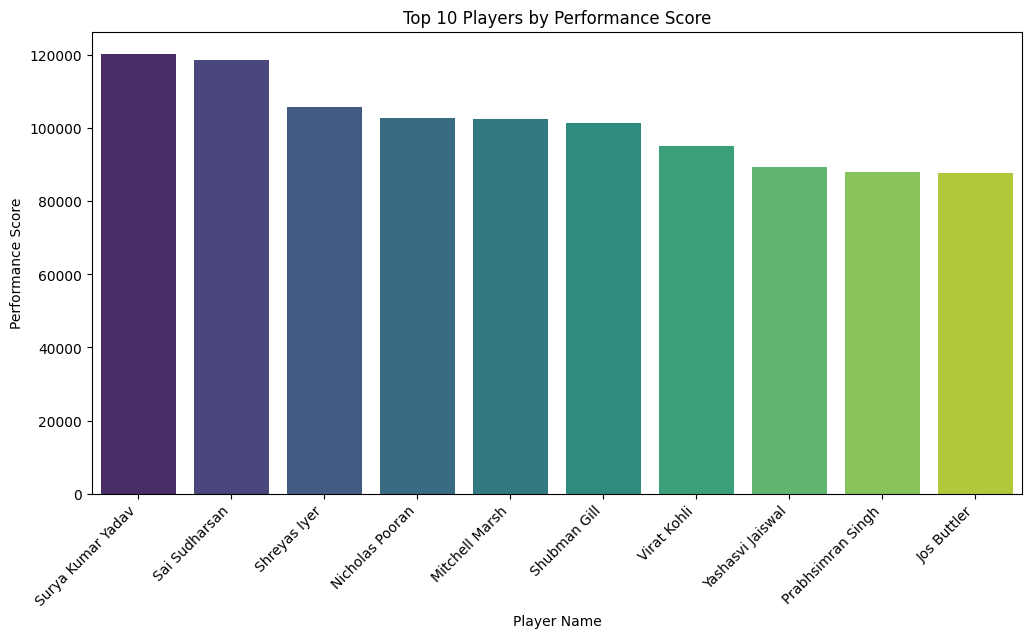

In [103]:
# bar chart
top10_players = df1.sort_values(by='Performance_Score', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Player Name', y='Performance_Score', data=top10_players, palette='viridis')
plt.title('Top 10 Players by Performance Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Performance Score')
plt.xlabel('Player Name')
plt.show()


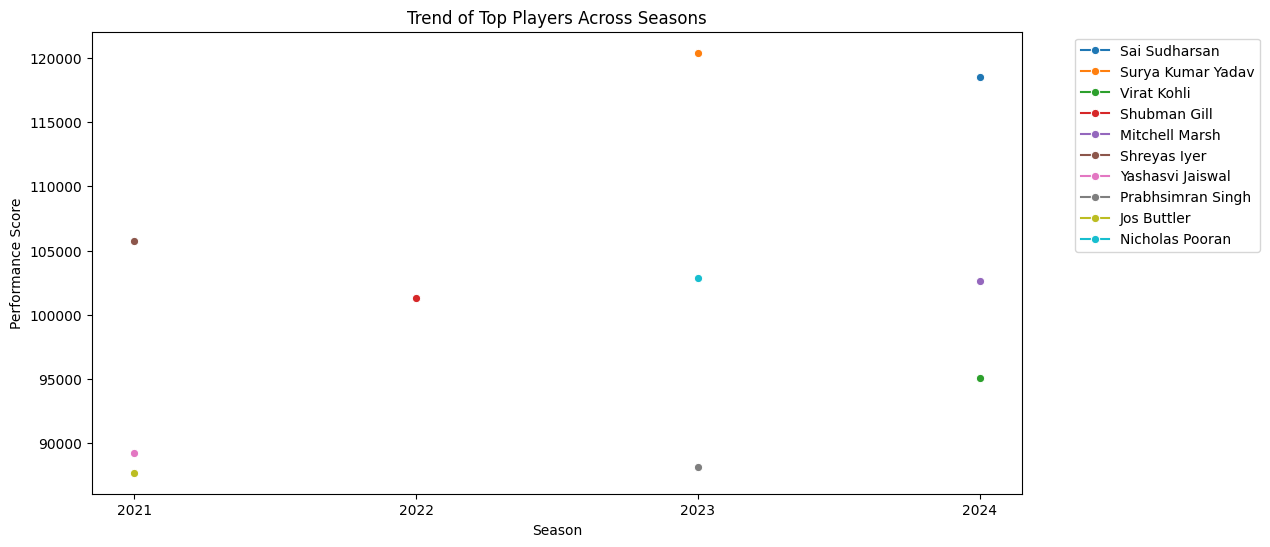

In [112]:
top_players_names = top10_players['Player Name'].tolist()
df_top_players = df1[df1['Player Name'].isin(top_players_names)]
plt.figure(figsize=(12,6))
sns.lineplot(x='SEASON', y='Performance_Score', hue='Player Name', data=df_top_players, marker='o')
plt.title('Trend of Top Players Across Seasons')
plt.ylabel('Performance Score')
plt.xlabel('Season')
plt.xticks([2021,2022,2023,2024])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


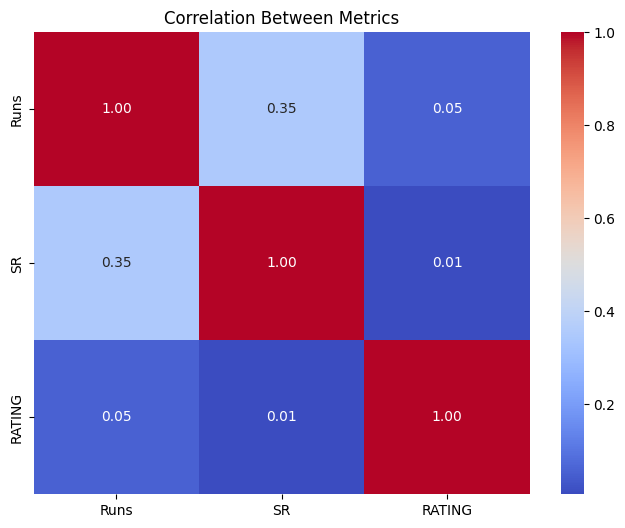

In [114]:
metrics = ['Runs', 'SR', 'RATING']
plt.figure(figsize=(8,6))
corr = df[metrics].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Metrics')
plt.show()


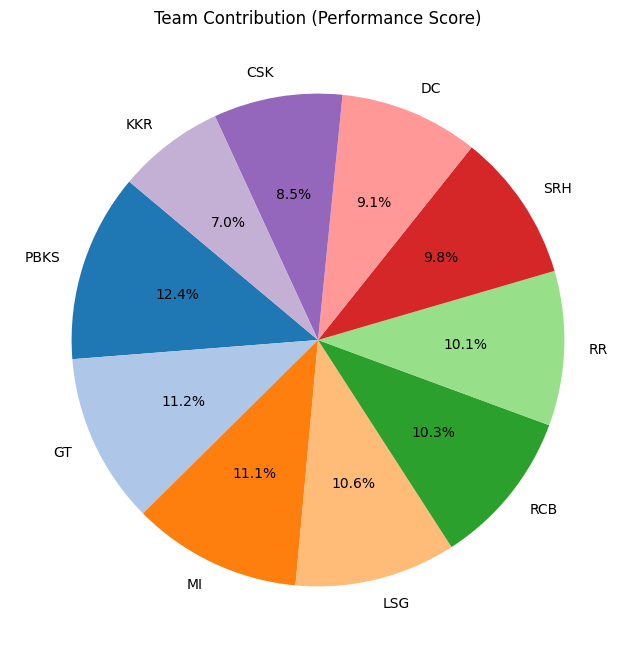

In [115]:
team_contrib = df1.groupby('Team')['Performance_Score'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(team_contrib, labels=team_contrib.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))
plt.title('Team Contribution (Performance Score)')
plt.show()


C:\Users\kanak\AppData\Local\Temp\ipykernel_20860\3196084524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Team', y='Performance_Score', data=df1, palette='Set3')


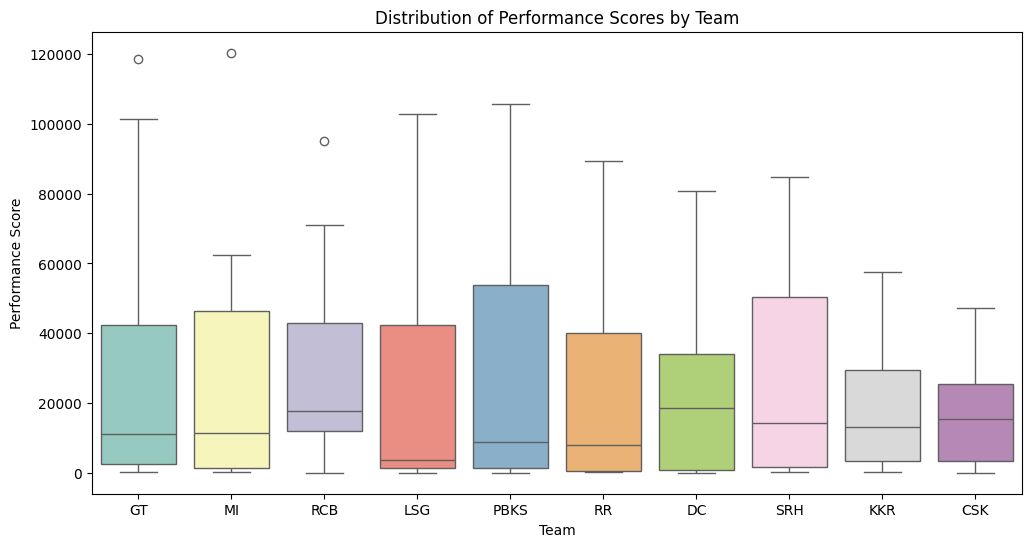

In [116]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Team', y='Performance_Score', data=df1, palette='Set3')
plt.title('Distribution of Performance Scores by Team')
plt.ylabel('Performance Score')
plt.xlabel('Team')
plt.show()
